<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [5]:
print("Training Data:",x_train.shape)
print("Training Label Data:",y_train.shape)
print("Testing Data:",x_test.shape)
print("Testing Label Data:",y_test.shape)

Training Data: (60000, 28, 28)
Training Label Data: (60000,)
Testing Data: (10000, 28, 28)
Testing Label Data: (10000,)


In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(10)
])

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,962,890
Trainable params: 3,962,890
Non-

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.02754348,  0.1061779 ,  0.08273983, -0.0855223 ,  0.13989791,
         0.00562061, -0.04361034, -0.10745947, -0.11861476, -0.01997463]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[2.3372640e-30, 2.1878570e-10, 2.1007349e-16, 1.0136192e-05,
        2.2476698e-07, 9.9998963e-01, 2.9053396e-19, 4.1381103e-08,
        8.1303094e-27, 5.5342433e-13]], dtype=float32)

In [10]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=128)

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 0.2078 - acc: 0.9358
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - acc: 0.9728
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0643 - acc: 0.9811
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0487 - acc: 0.9858
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0405 - acc: 0.9880
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0389 - acc: 0.9886
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0294 - acc: 0.9908
Epoch 8/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0247 - acc: 0.9925
Epoch 9/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0252 - acc: 0.9931
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0256 - acc: 0.9927
Epoch 11/30
469/469 [============================

In [12]:
history.history

{'loss': [0.20784898102283478,
  0.09049481153488159,
  0.06432486325502396,
  0.04868519306182861,
  0.040545739233493805,
  0.03887875750660896,
  0.029435791075229645,
  0.024688607081770897,
  0.02523774467408657,
  0.025566300377249718,
  0.021946953609585762,
  0.02049068547785282,
  0.01766800880432129,
  0.01749504543840885,
  0.01602008193731308,
  0.01727435551583767,
  0.017393937334418297,
  0.016881899908185005,
  0.01674516871571541,
  0.010823209770023823,
  0.011017341166734695,
  0.006392445880919695,
  0.016810836270451546,
  0.010033504106104374,
  0.011673351749777794,
  0.008935266174376011,
  0.00755787268280983,
  0.01445178035646677,
  0.012353143654763699,
  0.012215198017656803],
 'acc': [0.9358333349227905,
  0.9728333353996277,
  0.9810500144958496,
  0.9857833385467529,
  0.9879833459854126,
  0.9885666370391846,
  0.9907833337783813,
  0.9925166964530945,
  0.993149995803833,
  0.9927499890327454,
  0.9935166835784912,
  0.9944666624069214,
  0.99500000476

In [14]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1114 - acc: 0.9846


In [19]:
print(test_acc)

0.9783999919891357


In [ ]:
# evaluate the model
y_pred =  tf.nn.softmax(model.predict(x_test))

In [ ]:
# y_pred = y_pred.numpy().argmax(axis=1)

In [ ]:
y_pred[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[6.46745895e-13, 4.15253965e-08, 2.71365786e-12, 2.19644214e-09,
        5.62994273e-07, 1.08338490e-12, 1.75430847e-17, 9.99999166e-01,
        3.79135656e-09, 1.94224882e-07],
       [8.58053795e-14, 6.69986473e-13, 1.00000000e+00, 1.17479471e-10,
        3.76051119e-14, 2.00808030e-20, 1.15889354e-13, 6.50139239e-16,
        1.87110422e-17, 6.42071640e-26],
       [1.43385095e-21, 1.00000000e+00, 9.85798906e-19, 1.71858902e-23,
        3.57392847e-17, 1.24221682e-27, 1.07266472e-20, 1.38082914e-17,
        4.91005246e-17, 1.26417410e-26],
       [1.00000000e+00, 3.54199682e-22, 3.18923760e-16, 1.00223615e-26,
        1.32887828e-13, 3.82497802e-15, 5.61092622e-12, 3.02116643e-25,
        7.61667991e-18, 1.00151027e-18],
       [1.68508506e-11, 9.02943054e-10, 1.31132223e-11, 5.69828039e-13,
        9.99993920e-01, 2.18340165e-10, 7.74416606e-07, 6.52143617e-12,
        8.41026591e-08, 5.28411783e-06],
       [1.16278637e-20, 1

In [ ]:
result = np.where(y_pred == 8)
print(result[0].shape)

(1000,)


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 970,    0,    0,    0,    0,    1,    3,    1,    3,    2],
       [   0, 1128,    1,    2,    0,    1,    1,    0,    2,    0],
       [   8,    5,  984,    6,    2,    0,    3,    7,   17,    0],
       [   1,    0,    1,  977,    0,   11,    0,    6,    6,    8],
       [   0,    2,    0,    0,  956,    1,    6,    1,    5,   11],
       [   1,    0,    0,    4,    0,  871,    9,    1,    4,    2],
       [   1,    4,    1,    1,    4,    3,  941,    0,    3,    0],
       [   2,   13,    6,    2,    2,    0,    0,  990,    5,    8],
       [   1,    0,    0,    3,    3,   13,    3,    2,  946,    3],
       [   3,    4,    0,    0,    8,    7,    2,    5,    9,  971]])

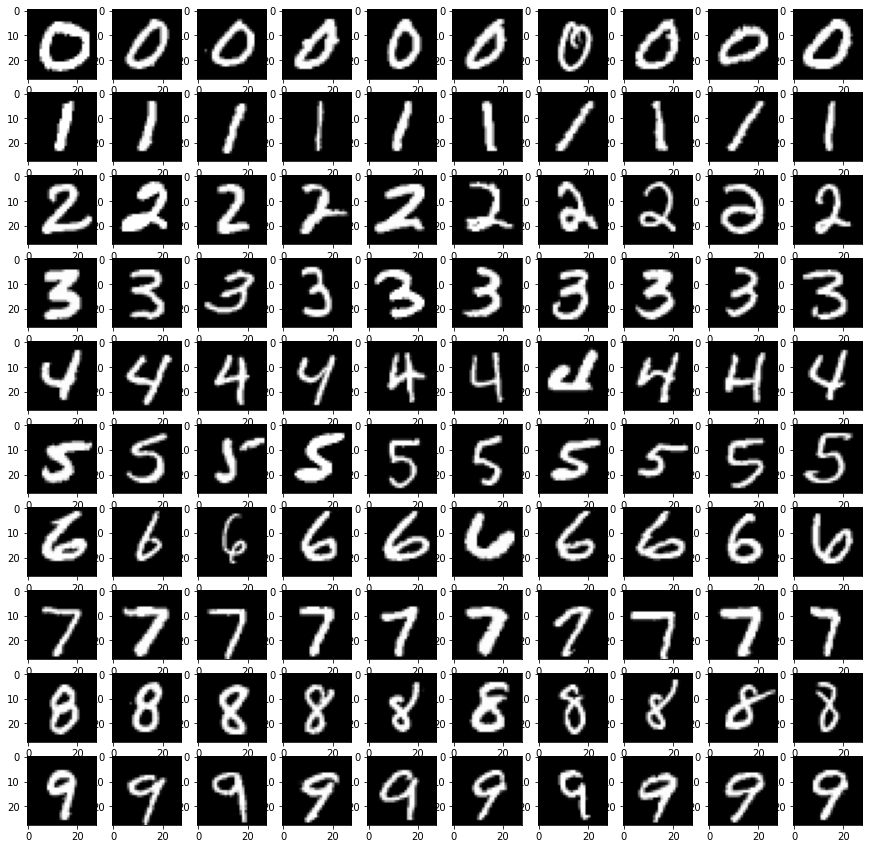

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = y_pred[:,i].cpu().numpy()
    result_idx = (-result).argsort()[:10]
    for j in range(10):
      axs[i,j].imshow(x_test[result_idx[j]], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
act_model5 = tf.keras.models.Sequential(model.layers[:5])
# act_model5 = Model(inputs=[model.input], outputs=[model.layers[5].output,])
act_model5.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h5_activations = act_model5.predict(x_test)

In [ ]:
h5_activations = tf.nn.softmax(h5_activations[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)
h5_activations.shape

(1000,)

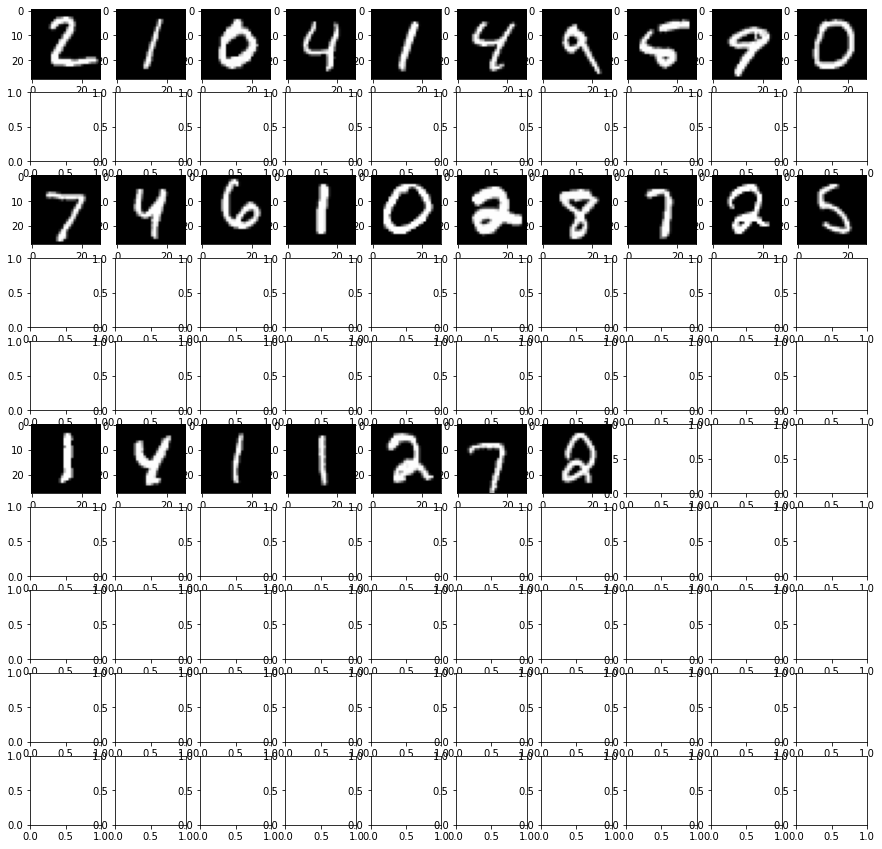

In [ ]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):  
    result = np.where(h5_activations==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(x_test[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()

In [16]:
total_idx = np.array(range(0,len(x_test)))
random_idxs = np.random.choice(a=total_idx,size=1000,replace=False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

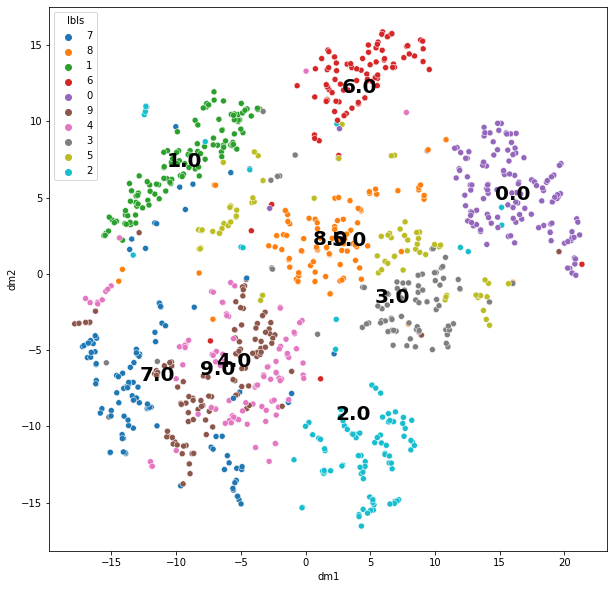

In [17]:
test_imgs = x_test[random_idxs]
test_labels = y_test[random_idxs]

#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(test_imgs.reshape([1000,28*28]))
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

[]

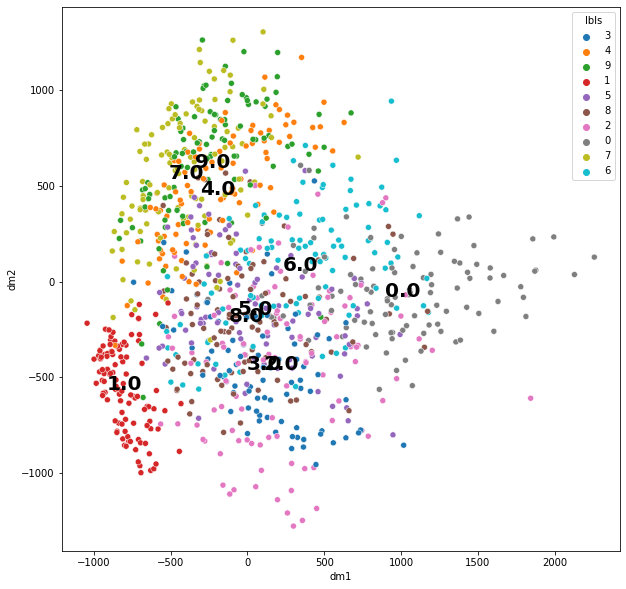

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(test_imgs.reshape([1000,28*28]))

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [ ]:
model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
act_model1 = Model(inputs=[model.input], outputs=[model.layers[1].output,])
act_model1.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h1_activations = act_model1.predict(test_imgs)

In [ ]:
print(h1_activations.shape)

(1000, 1024)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

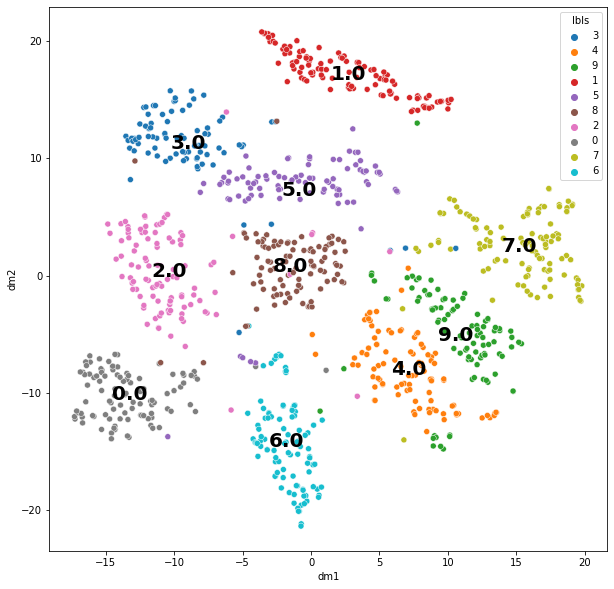

In [ ]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h1_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

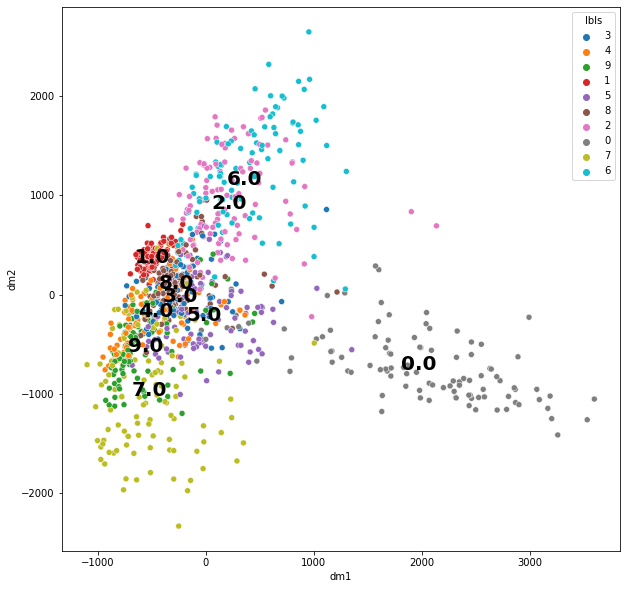

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h1_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [ ]:
act_model2 = tf.keras.models.Sequential(model.layers[:3])
# act_model2 = Model(inputs=[model.input], outputs=[model.layers[2].output,])
act_model2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h2_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

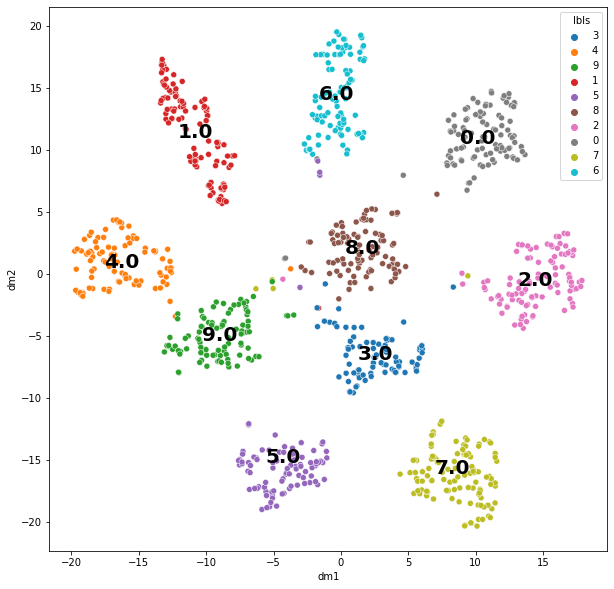

In [ ]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h2_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

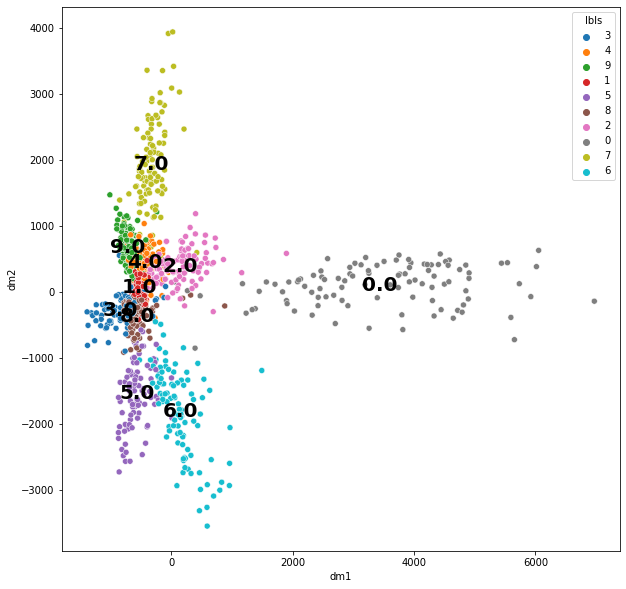

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h2_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [ ]:
act_model3 = tf.keras.models.Sequential(model.layers[:4])
# act_model3 = Model(inputs=[model.input], outputs=[model.layers[3].output,])
act_model3.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h3_activations = act_model2.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

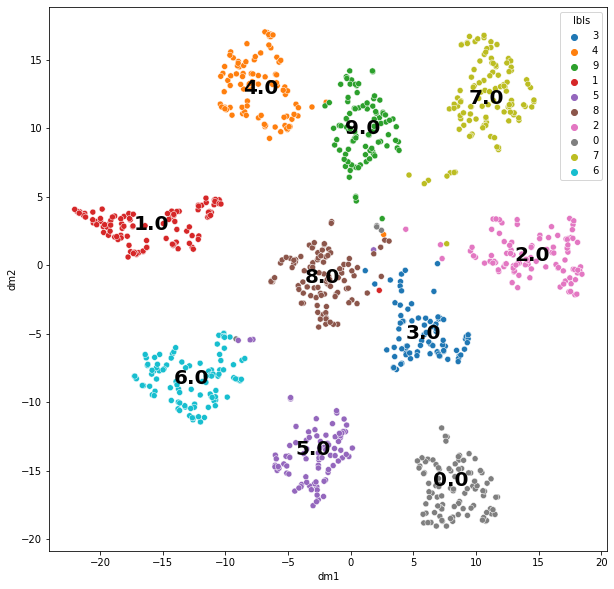

In [ ]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h3_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

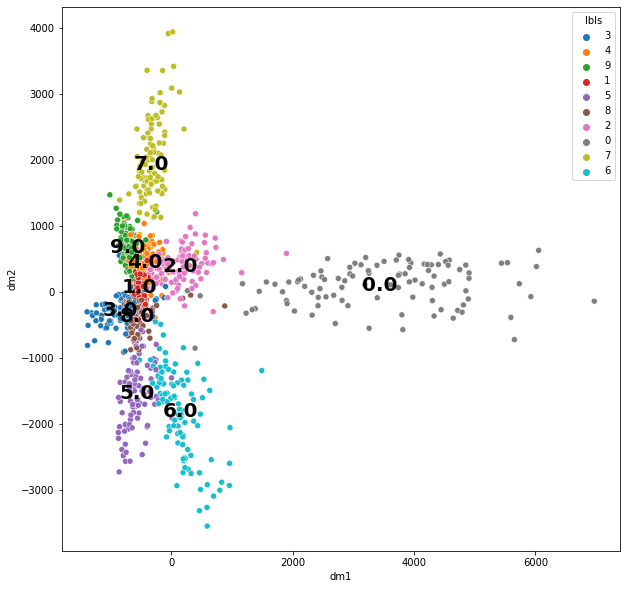

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h3_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [ ]:
act_model4 = tf.keras.models.Sequential(model.layers[:5])
# act_model4 = Model(inputs=[model.input], outputs=[model.layers[4].output,])
act_model4.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h4_activations = act_model4.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

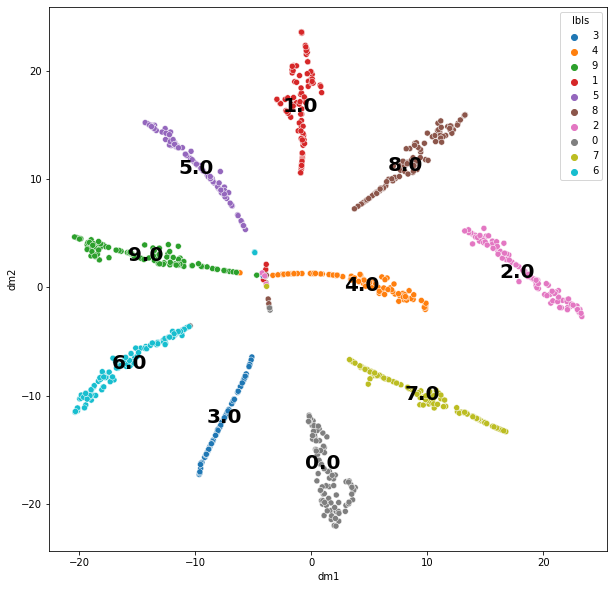

In [ ]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h4_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

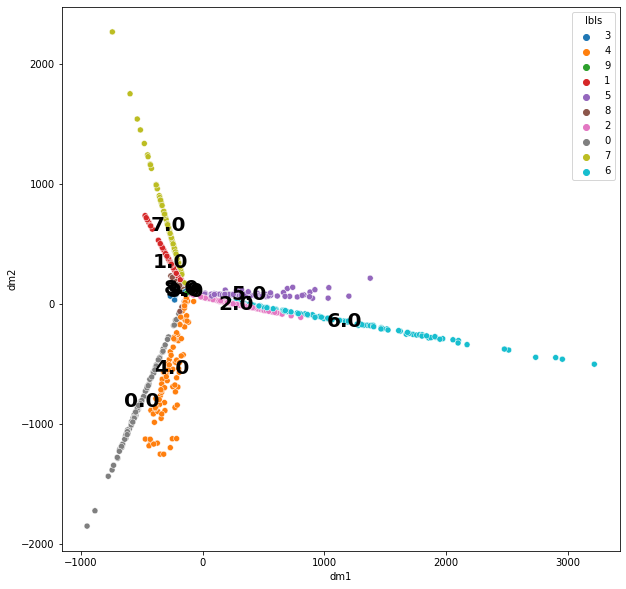

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h4_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

In [18]:
act_model5 = tf.keras.models.Sequential(model.layers)
# act_model5 = Model(inputs=[model.input], outputs=[model.layers[5].output,])
act_model5.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics="acc")
h5_activations = act_model5.predict(test_imgs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

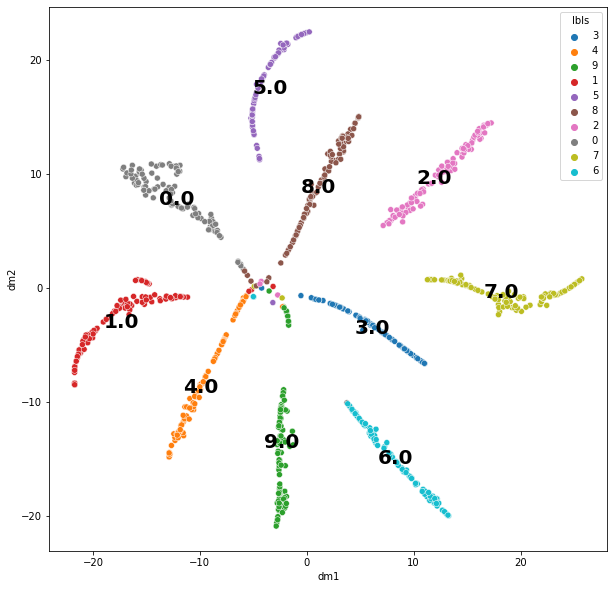

In [ ]:
#Applying TSNE transformation
test_2d_tsne = TSNE(n_components=2, n_iter=300).fit_transform(h5_activations)
df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_tsne,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid = df_centroid.sort_values(by="lbls",ascending=True)

plt.figure(figsize=(10,10))
sc_plot = sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()


[]

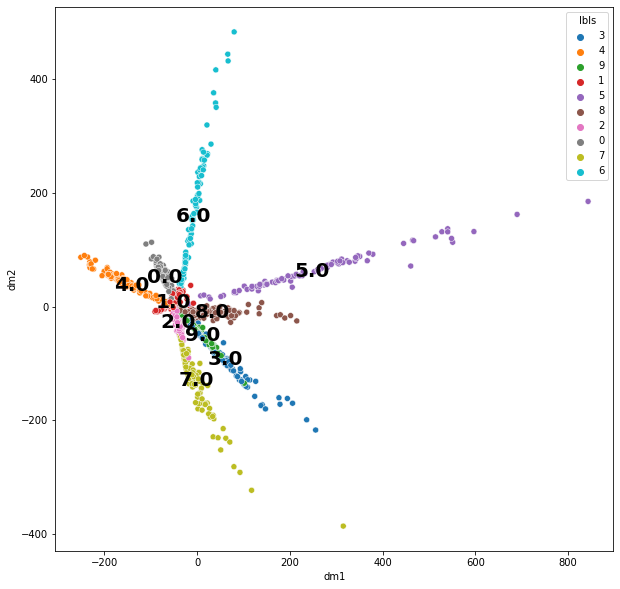

In [ ]:
#Applying pca transformation
test_2d_pca = PCA(n_components=2).fit_transform(h5_activations)

df_cols = ['dm1','dm2']
df = pd.DataFrame(test_2d_pca,columns=df_cols)
df["lbls"] = test_labels
df["lbls"] = df["lbls"].apply(lambda x:str(x))

#Getting centroid of each label
df_centroid = df.groupby("lbls").agg({"dm1":"mean","dm2":"mean"}).reset_index()
df_centroid["lbls"] = df_centroid["lbls"].apply(lambda x:int(x))
df_centroid.sort_values(by="lbls",ascending=True,inplace=True)

plt.figure(figsize=(10,10))
sns.scatterplot(x="dm1",y="dm2",hue="lbls",data=df,palette=sns.color_palette())
centroid_vals = df_centroid.values
for i in range(0,10):
  plt.text(x=centroid_vals[i,1],y=centroid_vals[i,2],s=str(centroid_vals[i,0]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='k')
plt.plot()

Problem 2: Adult Optimization

In [20]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
xavier_initializer = tf.keras.initializers.GlorotUniform(seed=None)
he_initializer = tf.keras.initializers.HeUniform(seed=None)

In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=normal_initializer),
  tf.keras.layers.Dense(10)
])

In [12]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])

In [13]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(512,kernel_initializer=normal_initializer,activation='relu'),
  tf.keras.layers.Dense(10)
])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 512)               262656    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
No

In [14]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,195,018
Trainable params: 1,195,018
No

In [15]:
model5 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(512,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10)
])

In [18]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam()
# print("[INFO] training network...")
model1.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [17]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 5s 4ms/step - loss: 2.3022 - accuracy: 0.1103 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135

In [19]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3055 - accuracy: 0.1069 - val_loss: 2.3029 - val_accuracy: 0.1010
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3032 - accuracy: 0.1082 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1094 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3022 - accuracy: 0.1095 - val_loss: 2.3033 - val_accuracy: 0.1028
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3022 - accuracy: 0.1125 - val_loss: 2.3006 - val_accuracy: 0.1009
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1032
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3013 - accuracy: 0.1126 - val_loss: 2.3034 - val_accuracy: 0.1028

In [20]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3021 - accuracy: 0.1120 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135

In [21]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.3068 - accuracy: 0.7039 - val_loss: 0.4786 - val_accuracy: 0.8770
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3946 - accuracy: 0.8913 - val_loss: 0.3158 - val_accuracy: 0.9130
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3064 - accuracy: 0.9122 - val_loss: 0.2746 - val_accuracy: 0.9218
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2645 - accuracy: 0.9240 - val_loss: 0.2397 - val_accuracy: 0.9299
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2367 - accuracy: 0.9319 - val_loss: 0.2179 - val_accuracy: 0.9376
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2144 - accuracy: 0.9388 - val_loss: 0.2013 - val_accuracy: 0.9409
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1963 - accuracy: 0.9438 - val_loss: 0.1863 - val_accuracy: 0.9459

In [22]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7045 - accuracy: 0.8189 - val_loss: 0.3390 - val_accuracy: 0.9046
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2975 - accuracy: 0.9143 - val_loss: 0.2562 - val_accuracy: 0.9273
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2390 - accuracy: 0.9313 - val_loss: 0.2133 - val_accuracy: 0.9392
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2046 - accuracy: 0.9406 - val_loss: 0.1924 - val_accuracy: 0.9444
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1806 - accuracy: 0.9486 - val_loss: 0.1765 - val_accuracy: 0.9481
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1621 - accuracy: 0.9536 - val_loss: 0.1616 - val_accuracy: 0.9519
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1462 - accuracy: 0.9586 - val_loss: 0.1557 - val_accuracy: 0.9546

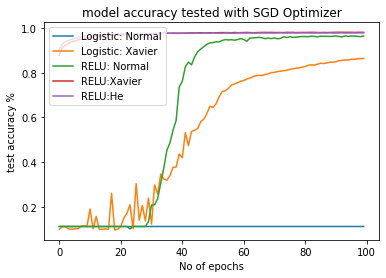

In [23]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with SGD Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [ ]:
model1.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model2.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model3.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model4.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model5.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
history1 = model1.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.9274 - accuracy: 0.6712 - val_loss: 0.4292 - val_accuracy: 0.8679
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3643 - accuracy: 0.8877 - val_loss: 0.3003 - val_accuracy: 0.9075
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2979 - accuracy: 0.9071 - val_loss: 0.2590 - val_accuracy: 0.9213
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2599 - accuracy: 0.9192 - val_loss: 0.2467 - val_accuracy: 0.9243
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2453 - accuracy: 0.9233 - val_loss: 0.2410 - val_accuracy: 0.9244
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2362 - accuracy: 0.9264 - val_loss: 0.2604 - val_accuracy: 0.9182
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2219 - accuracy: 0.9298 - val_loss: 0.2272 - val_accuracy: 0.9279

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7112 - accuracy: 0.7616 - val_loss: 0.3465 - val_accuracy: 0.8928
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3126 - accuracy: 0.9021 - val_loss: 0.3126 - val_accuracy: 0.9021
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.9188 - val_loss: 0.2463 - val_accuracy: 0.9240
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2328 - accuracy: 0.9276 - val_loss: 0.2207 - val_accuracy: 0.9316
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2066 - accuracy: 0.9357 - val_loss: 0.1918 - val_accuracy: 0.9388
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1945 - accuracy: 0.9384 - val_loss: 0.1808 - val_accuracy: 0.9445
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1822 - accuracy: 0.9415 - val_loss: 0.1787 - val_accuracy: 0.9437

In [ ]:
history3 = model3.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.0407 - accuracy: 0.8600 - val_loss: 0.1921 - val_accuracy: 0.9436
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1747 - accuracy: 0.9477 - val_loss: 0.1650 - val_accuracy: 0.9520
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1393 - accuracy: 0.9585 - val_loss: 0.1404 - val_accuracy: 0.9585
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.1376 - val_accuracy: 0.9590
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.1285 - val_accuracy: 0.9620
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.1268 - val_accuracy: 0.9646
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0853 - accuracy: 0.9738 - val_loss: 0.1240 - val_accuracy: 0.9632

In [ ]:
history4 = model4.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.1588 - accuracy: 0.9000 - val_loss: 0.1767 - val_accuracy: 0.9472
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1441 - accuracy: 0.9563 - val_loss: 0.1580 - val_accuracy: 0.9521
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1086 - accuracy: 0.9672 - val_loss: 0.1265 - val_accuracy: 0.9615
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.1228 - val_accuracy: 0.9662
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0769 - accuracy: 0.9759 - val_loss: 0.1216 - val_accuracy: 0.9685
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.1242 - val_accuracy: 0.9657
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.1285 - val_accuracy: 0.9666

In [ ]:
history5 = model5.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 1.2990 - accuracy: 0.9055 - val_loss: 0.1813 - val_accuracy: 0.9450
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1313 - accuracy: 0.9606 - val_loss: 0.1473 - val_accuracy: 0.9581
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0927 - accuracy: 0.9711 - val_loss: 0.1350 - val_accuracy: 0.9623
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.1475 - val_accuracy: 0.9602
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0707 - accuracy: 0.9782 - val_loss: 0.1292 - val_accuracy: 0.9663
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0634 - accuracy: 0.9799 - val_loss: 0.1416 - val_accuracy: 0.9636
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.1408 - val_accuracy: 0.9684

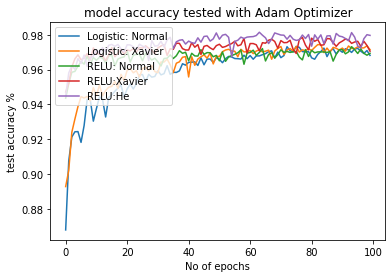

In [ ]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy tested with Adam Optimizer')
plt.ylabel('test accuracy %')
plt.xlabel('No of epochs')
plt.legend(['Logistic: Normal', 'Logistic: Xavier', 'RELU: Normal', 'RELU:Xavier','RELU:He'], loc='upper left')
plt.show()

In [ ]:
# w_value = xavier_initializer(shape=(784,512))
# b_value = xavier_initializer(shape=(512,))
# model1.layers[1].set_weights([w_value,b_value])
# w_value1 = xavier_initializer(shape=(512,512))
# model1.layers[2].set_weights([w_value1,b_value])
# w_value2 = xavier_initializer(shape=(512,512))
# model1.layers[3].set_weights([w_value2,b_value])
# w_value3 = xavier_initializer(shape=(512,512))
# model1.layers[4].set_weights([w_value3,b_value])
# w_value4 = xavier_initializer(shape=(512,10))
# b_value4 = xavier_initializer(shape=(10,))
# model1.layers[5].set_weights([w_value4,b_value4])

3.Dropout

In [21]:
model6 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dense(10)
])

In [22]:
model7 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])

In [23]:
model8 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dense(10)
])

In [24]:
model9 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])

In [26]:
adam = tf.keras.optimizers.Adam()
# print("[INFO] training network...")
model6.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model7.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model8.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model9.compile(optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [29]:
history6 = model6.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.6248 - accuracy: 0.7873 - val_loss: 0.2418 - val_accuracy: 0.9250
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1981 - accuracy: 0.9396 - val_loss: 0.1562 - val_accuracy: 0.9523
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1354 - accuracy: 0.9592 - val_loss: 0.1297 - val_accuracy: 0.9607
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1061 - accuracy: 0.9681 - val_loss: 0.1216 - val_accuracy: 0.9639
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0849 - accuracy: 0.9740 - val_loss: 0.1004 - val_accuracy: 0.9700
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0910 - val_accuracy: 0.9727
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0813 - val_accuracy: 0.9756

In [30]:
history7 = model7.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 2.2375 - accuracy: 0.1391 - val_loss: 1.7315 - val_accuracy: 0.2392
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 1.5028 - accuracy: 0.3453 - val_loss: 0.9150 - val_accuracy: 0.5699
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6075 - accuracy: 0.7929 - val_loss: 0.2540 - val_accuracy: 0.9408
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2666 - accuracy: 0.9350 - val_loss: 0.1741 - val_accuracy: 0.9542
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1873 - accuracy: 0.9527 - val_loss: 0.1478 - val_accuracy: 0.9629
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1465 - accuracy: 0.9628 - val_loss: 0.1255 - val_accuracy: 0.9696
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1209 - accuracy: 0.9683 - val_loss: 0.1077 - val_accuracy: 0.9723

In [27]:
history8 = model8.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2020 - accuracy: 0.9380 - val_loss: 0.1045 - val_accuracy: 0.9667
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.0790 - val_accuracy: 0.9774
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0998 - val_accuracy: 0.9734
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0475 - accuracy: 0.9859 - val_loss: 0.1018 - val_accuracy: 0.9725
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0786 - val_accuracy: 0.9788
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0904 - val_accuracy: 0.9769
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0784 - val_accuracy: 0.9806

In [28]:
history9 = model9.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.3626 - accuracy: 0.8999 - val_loss: 0.1310 - val_accuracy: 0.9649
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1582 - accuracy: 0.9573 - val_loss: 0.1064 - val_accuracy: 0.9703
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1222 - accuracy: 0.9677 - val_loss: 0.0944 - val_accuracy: 0.9737
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9723 - val_loss: 0.0859 - val_accuracy: 0.9746
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0874 - accuracy: 0.9756 - val_loss: 0.0883 - val_accuracy: 0.9765
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9784 - val_loss: 0.0825 - val_accuracy: 0.9784
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0733 - accuracy: 0.9803 - val_loss: 0.0755 - val_accuracy: 0.9801

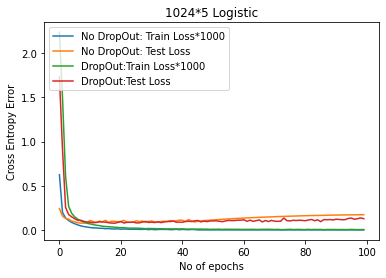

In [34]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('1024*5 Logistic')
plt.ylabel('Cross Entropy Error')
plt.xlabel('No of epochs')
plt.legend(['No DropOut: Train Loss*1000','No DropOut: Test Loss','DropOut:Train Loss*1000','DropOut:Test Loss'], loc='upper left')
plt.show()

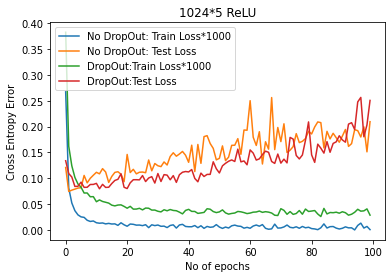

In [35]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('1024*5 ReLU')
plt.ylabel('Cross Entropy Error')
plt.xlabel('No of epochs')
plt.legend(['No DropOut: Train Loss*1000','No DropOut: Test Loss','DropOut:Train Loss*1000','DropOut:Test Loss'], loc='upper left')
plt.show()